In [1]:
import random
import collections
import pandas as pd 
import numpy as np
import networkx
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
fb_dir = "/Users/rezatabrizi/Downloads/facebook"

In [3]:
facebook_adj = pd.read_csv(os.path.join(fb_dir, "adj.txt"), sep = " ", header=None)
facebook_adj.columns = ['u', 'v']

In [4]:
facebook_adj

,u,v
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [5]:
class graph:
    def __init__(self, adj, directed, edge_weight="in_degree"):
        self.directed = directed
        self.edge_weight = edge_weight
        self._n = None
        self._m = None
        self.nodes = set()
        self.edges = collections.defaultdict(float)
        self.children = collections.defaultdict(set) 
        self.parents = collections.defaultdict(set)
        self._create_graph(adj)

    def _create_graph (self, adj):
        for idx, row in adj.iterrows():
            u = row.iloc[0] 
            v = row.iloc[1]

            self.nodes.add(u)
            self.nodes.add(v)

            self.edges[(u, v)] = 0.0
            if (not self.directed):
                self.edges[(v, u)] = 0.0

            self.parents[v].add(u)
            self.children[u].add(v)
            
            if (not self.directed):
                self.parents[u].add(v)
                self.children[v].add(u)


        for u, v in self.edges.keys():
            if self.edge_weight == "in_degree":
                self.edges[(u, v)] = 1.0 / len(self.parents[v])
            elif self.edge_weight == "normal":
                self.edges[(u, v)] = np.clip(np.random.normal(.02, .007), 0, 1)
                
        self._n = len(self.nodes)
        self._m = len(self.edges)

## Statistics and Data Visualization of the Underlying Graph
1. Histogram of the out degree of each node

In [6]:
graph_gaussian = graph(facebook_adj, False, 'normal')
graph_indeg = graph(facebook_adj, False, 'in_degree')

In [7]:
(graph_indeg.edges[(0, 1)])

0.058823529411764705

Text(0, 0.5, 'Number of Nodes')

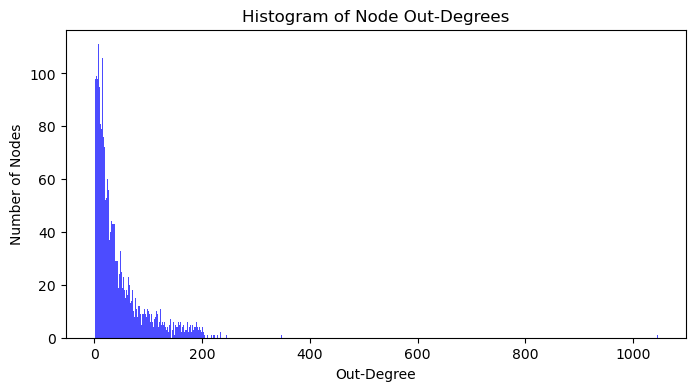

In [8]:
out_degrees = [len(graph_gaussian.children[n]) for n in range(graph_gaussian._n)]
plt.figure(figsize=(8, 4))
plt.hist(out_degrees, bins=range(max(out_degrees)+2), align='left', color='blue', alpha=0.7)
plt.title('Histogram of Node Out-Degrees')
plt.xlabel('Out-Degree')
plt.ylabel('Number of Nodes')


In [9]:
print (f"Average outdegree {sum(out_degrees)/len(out_degrees)}")

Average outdegree 43.69101262688784


In [10]:
def independent_cascade(graph, seed_set):
    can_activate_q = collections.deque()
    seed = set()
    
    for node in seed_set: 
        can_activate_q.append((node, 0))
    cascade = [] 

    while can_activate_q:
        u, u_t = can_activate_q.popleft() 
        cascade.append((u, u_t))
        
        for v in graph.children[u]:
            chance = random.random()
            w = graph.edges[(u, v)]
            if v not in seed and chance <= w:
                seed.add(v) 
                can_activate_q.append((v, u_t+1))
    
    return cascade

In [11]:
def powerlaw_sample(min_value, max_value, exponent):
    """choose a number based on the power law distribution

    Args:
        min_value (int): min range
        max_value (int): max range
        exponent (int): power law exponent

    Returns:
        int: randomly chosen number based on he power law
    """
    y = (max_value**(exponent+1) - min_value**(exponent+1)) * random.random() + min_value**(exponent+1)
    return int(y**(1/(exponent+1)))

In [12]:
def generate_cascades(graph):
    seeds = []
    regression = []
    classification = []
    iters = 0
    while iters < 2000:
    
        seed_count = powerlaw_sample(1, graph._n, -2.5)
        seed_nodes = random.sample(range(graph._n), seed_count)
        seeds.append(seed_nodes)
    
        sum_activations = 0 
        sample = False
        i = 0
        while i < 10:
            currrent_cascade = independent_cascade(graph, seed_nodes)
            if (not sample and len(currrent_cascade) >= 3):
                classification.append(currrent_cascade)
                sample = True
            sum_activations += len(currrent_cascade)
            i += 1
        regression.append(sum_activations/10)
        iters += 1
    return seeds, regression, classification    

In [13]:
regression_cas_count = generate_cascades(graph_indeg)

In [14]:
seeds, regression_cascades, classification_cascades = regression_cas_count

In [15]:
regression_cascades

[54.4,
 3.2,
 23.4,
 24.5,
 12.3,
 34.1,
 2.2,
 4.5,
 11.5,
 12.6,
 30.2,
 1.8,
 15.3,
 9.4,
 6.9,
 21.8,
 16.6,
 41.5,
 1.3,
 28.6,
 38.7,
 28.4,
 101.6,
 69.1,
 27.6,
 31.9,
 33.1,
 1.8,
 12.2,
 12.2,
 48.3,
 2.5,
 28.3,
 5.0,
 30.0,
 24.3,
 3.9,
 25.2,
 33.4,
 11.2,
 1.1,
 5.3,
 3.8,
 141.4,
 1.9,
 16.0,
 11.7,
 3.5,
 16.3,
 4.7,
 9.7,
 9.0,
 2.2,
 4.0,
 1.4,
 24.2,
 30.1,
 31.1,
 13.1,
 13.8,
 10.0,
 9.2,
 30.6,
 44.8,
 6.4,
 1.0,
 172.2,
 1.3,
 2.2,
 3.1,
 32.0,
 69.6,
 8.8,
 2.5,
 3.0,
 6.8,
 52.5,
 13.7,
 20.5,
 5.3,
 2.9,
 8.9,
 6.4,
 9.3,
 36.4,
 17.3,
 17.0,
 8.1,
 3.6,
 4.5,
 16.7,
 6.2,
 22.8,
 29.7,
 29.6,
 2.4,
 7.5,
 11.7,
 10.9,
 13.1,
 46.7,
 7.6,
 2.1,
 6.4,
 6.3,
 25.7,
 35.8,
 5.1,
 9.7,
 6.7,
 1.5,
 2.0,
 8.0,
 9.0,
 60.3,
 12.2,
 2.5,
 1.2,
 5.4,
 2.2,
 33.3,
 6.8,
 3.7,
 26.2,
 5.0,
 1.4,
 3.7,
 1.9,
 1.0,
 10.2,
 4.5,
 7.9,
 3.0,
 21.1,
 5.3,
 3.3,
 5.5,
 11.6,
 15.5,
 1.0,
 2.8,
 5.8,
 1.6,
 90.2,
 1.5,
 1.0,
 9.2,
 14.2,
 32.9,
 5.3,
 1.7,
 10.6,
 10.8,
 21.7,

In [28]:
def create_raw_classificaiton_data(classification_cascades): 
    with open ('raw_classification_facebook.txt', 'w') as file: 
        for i, cascade in enumerate(classification_cascades):
            if (len(cascade) > 250): continue
            file.write(f"{i} ")
            for node, t in cascade: 
                file.write(f"{node}:{t} ")
            file.write(f"\n")

def create_raw_regression_data(seed_set, regression_cascades):
    with open ('raw_regresssion_facebook.txt', 'w') as file:
        for i, activation_count in enumerate(regression_cascades):
            if(activation_count > 250): 
                continue
            file.write(f"{i} ")
            for seed_node in seed_set[i]: 
                file.write(f"{seed_node} ")
            file.write(f"{activation_count}\n")

In [29]:
create_raw_classificaiton_data(classification_cascades)
create_raw_regression_data(seeds, regression_cascades)

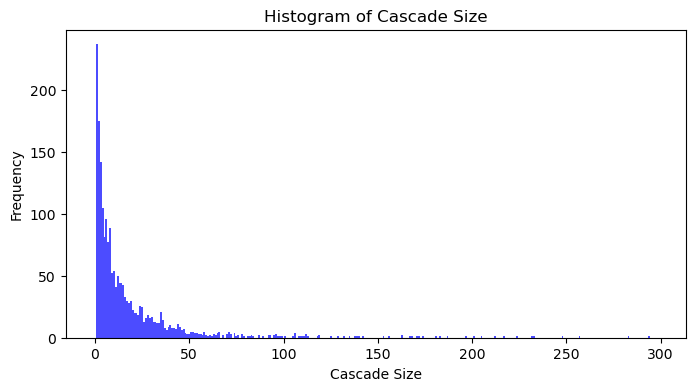

In [33]:
plt.figure(figsize=(8, 4))
plt.hist(regression_cascades, bins=range(300), align='left', color='blue', alpha=0.7)
plt.title('Histogram of Cascade Size')
plt.xlabel('Cascade Size')
plt.ylabel('Frequency')

plt.show()

In [ ]:
import networkx as nx
edges = [list(row) for i, row in facebook_adj.iterrows()]
facebook_nx_g = nx.Graph()
facebook_nx_g.add_edges_from(edges)

In [ ]:
def generate_static_centrality_features (graph):
    edges = [(u, v) for u,v in graph.edges.keys()]
    if (graph.directed):
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    
    G.add_edges_from(edges) 
    
    degree_centrality_facebook = nx.degree_centrality(G)
    eigenvector_centrality_facebook = nx.eigenvector_centrality(G)
    betweeness_centrality_facebook = nx.betweenness_centrality(G)

    with open ('static_node_centrality_facebook.txt', 'w') as file: 
        for node_idx in range(graph._n):
            file.write(f"{node_idx} {degree_centrality_facebook[node_idx]} {eigenvector_centrality_facebook[node_idx]} {betweeness_centrality_facebook[node_idx]}\n")

In [ ]:
generate_static_centrality_features(graph_gaussian)

### Diameter of the graph

In [ ]:
nx.diameter(facebook_nx_g)

8

In [64]:
def filter_data(intervals):
    """ Get the 97.5 % percentile of the data
    """
    m_u = np.mean(intervals)
    sd = np.std(intervals)
    right_bound = m_u + 1.96 * sd
    data = intervals[intervals < right_bound]
    return data

def seed_count(cascade, sd):
    """ Get seed """
    times = []
    users = []
    for activation in cascade:
        u, t = activation.split(':')
        users.append(u)
        times.append(float(t))

    times = np.array(times)
    users = np.array(users)
    
    mean_time = np.mean(times)
    sd_time = np.std(times)

    print(mean_time)
    print(sd_time)
    bound = mean_time - (sd_time * sd)
    
    seed = []
    for i in range(len(users)):
        if times[i] <= bound:
            seed.append(users[i])
        else:
            break
    
    return np.array(seed)

    
def get_intervals(cascade):
    """ Get the intervals given a cascade in string
    """
    times = [float(act.split(':')[1]) for act in cascade]
    intervals = np.array([])
    for i in range(0, len(times)):
        intervals = np.append(intervals, (times[i])-(times[0]))
    return intervals



### Eearthquake Cascades Data Analysis

In [65]:
with open ("data/raw/regression/earthquake/cascade.txt", "r") as f: 
    content = f.readlines()
    sample = content[1]
    cascade = sample.split()[1:]
    seeds = seed_count(cascade, 1)
    print(len(cascade))
    print(len(seeds))
    
    #plt.figure(figsize=(10, 6))
    #plt.hist(updated_intervals, bins = 100, range=(0,1000), edgecolor='k', alpha=0.7)

3429.983870967742
6618.8339814451765
62
0


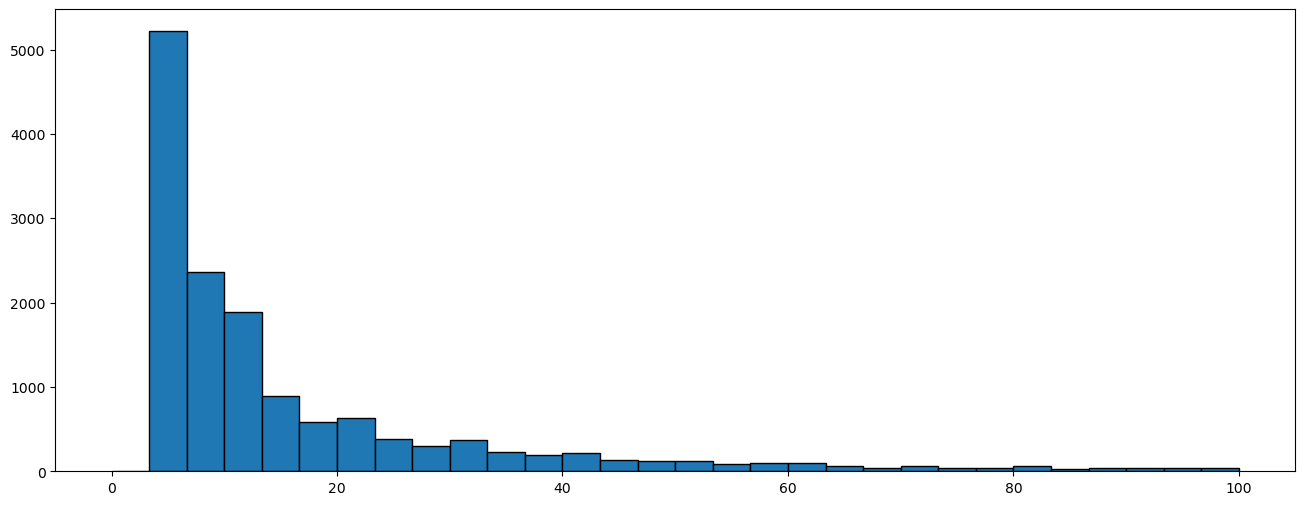

In [72]:
with open ("data/raw/regression/earthquake/cascade.txt", "r") as f: 
    content = f.readlines()
    cas_count = [len(cascade.split()[1:]) for cascade in content]
    plt.figure(figsize=(16, 6))
    plt.hist(cas_count, range=(0,100), bins=30, edgecolor='k')
